# M2: U-Net Reconstruction Analysis

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from M2_inference import run_inference

In [19]:
# Run inference
test_gdth = "../../testing_set"
test_dirty = "../../testing_set_dirty"
model_path = "../results/M2/models/default/model_epoch_5.ckpt"
n_ch = 64
depth = 3

df = run_inference(test_gdth, test_dirty, model_path, n_ch=n_ch, depth=depth, verbose=False)

# Print statistics
print("="*60)
print("INFERENCE RESULTS")
print("="*60)
print(f"Number of test images: {len(df)}")

print("\n--- Backprojected Images ---")
print(f"Mean SNR:  {df['snr_backprojected'].mean():.2f} ± {df['snr_backprojected'].std():.2f} dB")
print(f"Mean SSIM: {df['ssim_backprojected'].mean():.4f} ± {df['ssim_backprojected'].std():.4f}")

print("\n--- U-Net Reconstructed Images ---")
print(f"Mean SNR:  {df['snr_reconstructed'].mean():.2f} ± {df['snr_reconstructed'].std():.2f} dB")
print(f"Mean SSIM: {df['ssim_reconstructed'].mean():.4f} ± {df['ssim_reconstructed'].std():.4f}")

print("\n--- Improvement ---")
print(f"SNR improvement:  {df['snr_reconstructed'].mean() - df['snr_backprojected'].mean():.2f} dB")
print(f"SSIM improvement: {df['ssim_reconstructed'].mean() - df['ssim_backprojected'].mean():.4f}")

print("\n--- Inference Time ---")
print(f"Mean time per image: {df['time_seconds'].mean():.4f} ± {df['time_seconds'].std():.4f} seconds")
print("="*60)

INFERENCE RESULTS
Number of test images: 20

--- Backprojected Images ---
Mean SNR:  15.42 ± 1.11 dB
Mean SSIM: 0.6897 ± 0.0482

--- U-Net Reconstructed Images ---
Mean SNR:  19.79 ± 1.35 dB
Mean SSIM: 0.8293 ± 0.0326

--- Improvement ---
SNR improvement:  4.37 dB
SSIM improvement: 0.1396

--- Inference Time ---
Mean time per image: 0.2874 ± 0.0430 seconds


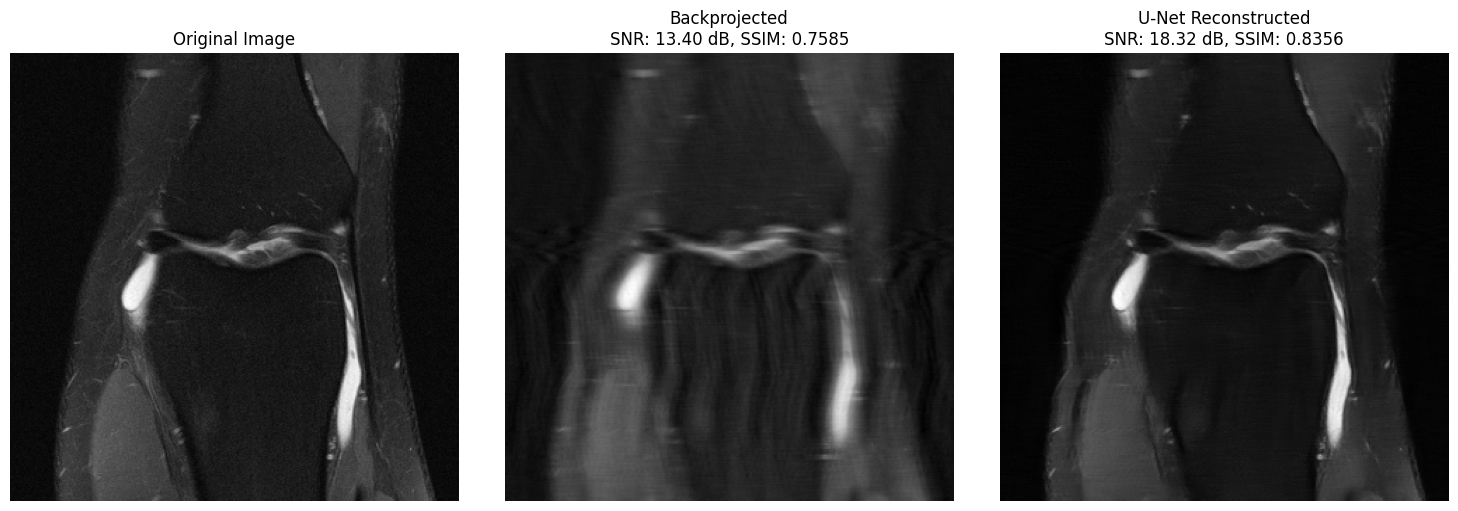

In [20]:
# Visualize first test image
first_row = df.iloc[0]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(first_row['original'], cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(first_row['dirty'], cmap='gray')
axes[1].set_title(f'Backprojected\nSNR: {first_row["snr_backprojected"]:.2f} dB, SSIM: {first_row["ssim_backprojected"]:.4f}')
axes[1].axis('off')

axes[2].imshow(first_row['reconstructed'], cmap='gray')
axes[2].set_title(f'U-Net Reconstructed\nSNR: {first_row["snr_reconstructed"]:.2f} dB, SSIM: {first_row["ssim_reconstructed"]:.4f}')
axes[2].axis('off')

plt.tight_layout()
plt.show()